In [ ]:
pip install factor_analyzer

     |████████████████████████████████| 40kB 1.8MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40380 sha256=d141423096b577f8c5ef30aca56946335a610011f0284e6a55eedb1c21117d43
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from factor_analyzer import FactorAnalyzer

In [ ]:
df = pd.read_csv("bfi.csv",index_col=0,header=0)

In [ ]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [ ]:
df.drop(['gender','education','age'],axis=1,inplace=True)

In [ ]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 61617 to 67560
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2784 non-null   float64
 1   A2      2773 non-null   float64
 2   A3      2774 non-null   float64
 3   A4      2781 non-null   float64
 4   A5      2784 non-null   float64
 5   C1      2779 non-null   float64
 6   C2      2776 non-null   float64
 7   C3      2780 non-null   float64
 8   C4      2774 non-null   float64
 9   C5      2784 non-null   float64
 10  E1      2777 non-null   float64
 11  E2      2784 non-null   float64
 12  E3      2775 non-null   float64
 13  E4      2791 non-null   float64
 14  E5      2779 non-null   float64
 15  N1      2778 non-null   float64
 16  N2      2779 non-null   float64
 17  N3      2789 non-null   float64
 18  N4      2764 non-null   float64
 19  N5      2771 non-null   float64
 20  O1      2778 non-null   float64
 21  O2      2800 non-null   int64  


In [ ]:
df = df.iloc[0:,1:26]

In [ ]:
df = df.dropna()

In [ ]:
  fa = FactorAnalyzer(n_factors=6,rotation='varimax')

In [ ]:
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [ ]:
pd.DataFrame(fa.loadings_)

,0,1,2,3,4,5
0,0.019593,0.129682,0.109792,0.648858,0.093491,-0.084924
1,-0.017662,0.203330,0.082358,0.705688,0.076944,0.032217
2,-0.084078,0.126836,0.209346,0.479331,-0.096146,-0.005851
3,-0.155395,0.292209,0.076372,0.589693,0.068895,0.145131
4,-0.004557,0.060016,0.559406,0.047516,0.190223,0.111183
5,0.065548,0.005585,0.676102,0.112069,0.085346,0.156104
6,-0.039038,0.009225,0.544651,0.130555,-0.005560,-0.011617
7,0.214763,-0.081616,-0.636035,-0.071140,-0.138291,0.321296
8,0.278485,-0.179717,-0.536030,-0.102143,0.022109,0.155294
9,0.019199,-0.580768,0.048803,-0.179910,-0.075236,0.085471


In [ ]:
ev, v = fa.get_eigenvalues()

In [ ]:
ev

array([5.08092085, 2.74459613, 2.1304715 , 1.85166008, 1.37255602,
       0.95495549, 0.81706596, 0.79947803, 0.71165481, 0.68367205,
       0.66388814, 0.64249178, 0.59548761, 0.5646522 , 0.56130638,
       0.522671  , 0.50606487, 0.48864688, 0.44897785, 0.4230324 ,
       0.40315599, 0.38836649, 0.3811952 , 0.26303227])

In [ ]:
v

array([ 4.46875912e+00,  2.18680032e+00,  1.46827146e+00,  1.06901254e+00,
        7.27235461e-01,  2.53243714e-01,  1.63937187e-01,  9.50627727e-02,
        2.62125175e-02,  3.77849106e-03, -1.23037055e-02, -6.19875596e-02,
       -8.14053341e-02, -1.01551121e-01, -1.19736816e-01, -1.31363874e-01,
       -1.68725050e-01, -1.81191741e-01, -1.99899892e-01, -2.14267137e-01,
       -2.39210078e-01, -2.64349754e-01, -2.77010939e-01, -2.85479627e-01])

In [ ]:
import numpy as np
4.46875912e+00 * np.sqrt(5.08092085)

10.072984374379132

### Scree Plot

In [ ]:
xvals = range(1,df.shape[1]+1)

Text(0, 0.5, 'Eigen Values')

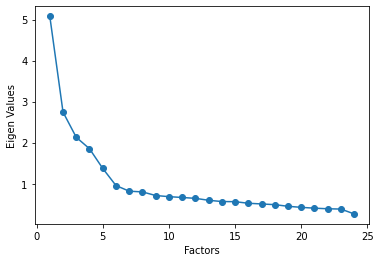

In [ ]:
plt.scatter(xvals,ev)
plt.plot(xvals,ev)
plt.xlabel("Factors")
plt.ylabel("Eigen Values")

https://stats.idre.ucla.edu/spss/seminars/introduction-to-factor-analysis/a-practical-introduction-to-factor-analysis/

In [ ]:
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)    

model_dict = {"F1": ["V1", "V2", "V3", "V4"], "F2": ["V5", "V6", "V7", "V8"]}

model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df, model_dict)

cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False) 

cfa.fit(df.values) 

cfa.loadings_ 